# Predicción de Potabilidad del Agua

En esta ocasión se busca desarrollar un proceso de búsqueda de hiperparámetros para un modelo de Máquina de Soporte Vectorial (SVM).

Se sugiere fuertemente leer la documentación entregada en los artículos de los links.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno. 

In [27]:
# importar librerias
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score 

# libreria de Support Vector Machine
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.utils import resample
from sklearn.utils import shuffle

Lectura de CSV y borrado de filas incompletas.

In [2]:
# cargar datos de entrenamiento
# eliminar filas con NAs
df = pd.read_csv('waterPotability/water_potability.csv').dropna()
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

<AxesSubplot:ylabel='Potability'>

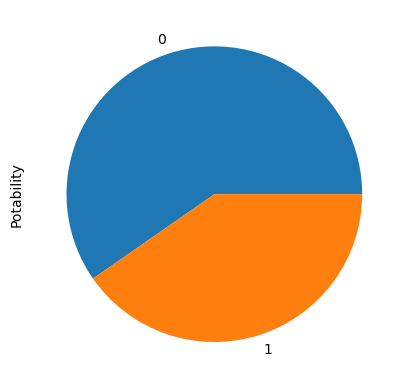

In [3]:
# crear pie plot
# observar balance de clases

df['Potability'].value_counts().plot(kind='pie')

### Manejo de Datos Desbalanceados: Remuestreo

In [4]:
from sklearn.utils import resample
from sklearn.utils import shuffle

# separar base en etiquetas de 0 y 1

zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1

# crear minority class sample 

# base de muestras de la clase minoritaria que se va a resamplear
# resample(base de etiqueta, replace = True, n_samples = N)
df_minority_upsampled = resample(one, replace = True, n_samples = 1200)

# concatenar bases mayoritaria con base minoritaria resampleada
df = pd.concat([zero, df_minority_upsampled])

# volver aleatorias las muestras
df = shuffle(df) # shuffling so that there is NO particular sequence

df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1411,6.989814,221.000235,20769.519636,8.361019,307.523159,326.586360,12.286237,62.768615,4.808583,0
2918,6.106760,211.454489,39430.307823,8.316897,348.776719,389.591440,12.896953,85.358049,3.924967,0
1631,7.539287,258.490076,26999.382076,7.002092,266.803123,352.195912,14.650809,59.158843,5.427373,1
1515,7.330197,159.803720,14884.339958,9.194575,411.100692,404.195912,17.375739,51.153972,2.884715,1
3030,8.040392,200.637576,12999.144804,6.696356,356.870041,394.017732,11.100407,43.625910,3.017796,0
...,...,...,...,...,...,...,...,...,...,...
1119,5.078274,185.088385,18125.638398,4.105766,275.055642,528.156251,11.325447,80.338331,3.631042,1
271,7.275909,175.220376,22644.766348,7.886855,293.309854,373.345693,17.411683,56.799287,5.062298,1
256,8.322987,207.252462,28049.646283,8.827061,297.813085,358.725869,18.709273,60.911420,4.052136,1
862,8.159667,215.648216,17068.298863,8.769622,319.253201,459.541159,14.192544,60.373722,2.957195,0


<AxesSubplot:ylabel='Potability'>

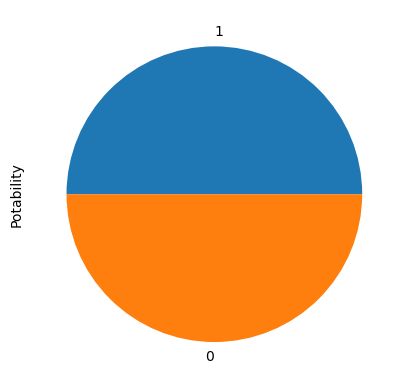

In [5]:
df['Potability'].value_counts().plot(kind='pie')

In [6]:
# crear base de variables/predictores
X = df.drop(['Potability'], axis = 1)

# crear variable a predecir (clasificacion es etiqueta)
y = df['Potability']

In [7]:
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

### Separación en Conjuntos de Validación/Prueba

Separe los datos (`X` y `y`) en conjuntos de:

- Entrenamiento (70%)
- Validación (15%)
- Prueba (15%)

Utilizando `train_test_split`.

In [8]:
# split bases de variables y etiquetas en: 1 train, 2 val, 3 test

# dividir datos X,y en train-set y test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    random_state = 1000)


# dividir datos de train-set en train-set y validation-set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2142, random_state=1000) # 0.2142 x 0.7 = 0.15
    
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2829,7.342231,198.168804,35273.976229,5.268807,300.405924,448.151669,12.388549,62.743383,4.261504
397,5.040332,232.234479,25653.690231,5.929308,328.329580,529.052535,13.539410,38.346738,3.603326
280,9.794559,129.870958,20682.731742,9.390843,291.980083,427.123948,11.853228,78.711469,2.945419
3031,8.550428,206.522566,10453.087323,6.482009,326.125482,347.824328,13.997466,42.290535,4.903870
710,5.251354,167.924336,34768.933420,4.023081,377.143489,315.536105,10.429159,70.593387,4.072252
...,...,...,...,...,...,...,...,...,...
2328,6.071839,217.826531,17162.753927,3.521125,319.037346,612.094926,16.542239,64.826308,2.691610
2650,8.000776,237.519250,18419.132883,8.323330,308.006321,396.376554,13.492536,82.753278,4.519210
2359,7.851926,235.338312,14763.580113,7.741975,338.603322,505.665639,11.863370,49.598381,5.204044
2862,6.701941,168.745414,17176.878951,6.390966,330.674729,404.930726,10.827840,52.112707,4.179450


## Parte 1: Evaluación de Modelos y GridSearch

Como recordará, en la tarea anterior se realizó un proceso de GridSearch y RandomizedSearch. En esta ocasión, nuevamente implementará este procedimiento para encontrar los mejores hiperparámetros.

Esta vez, se le solicita **desarrollar cada uno de los casos de forma manual y sin utilizar la librería SciKit-Learn (utilice ciclos `for`), obtener los mejores parámetros para los datos de VALIDACIÓN y graficar el histórico para los rangos del parámetro de regularización.**

- Kernel: Lineal, Polinomial (utilizar grados 1, 2, 3 y 4), Función Base Radial (RBF), Sigmoide.
- Parámetro de Regularización: Recorrido en escala logarítmica desde $10^{-3}$ hasta $10^{5}$.

Utilice la función `SVC` de `sklearn.svm` para definir y ajustar cada modelo.

Puede encontrar algo de información en el siguiente artículo y en sus notas de clase:

- [SVM and Kernel SVM](https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200)

### Búsqueda de Hiperparámetros con GridSearch
### Datos de Validación


#### Caso 1: Kernel Lineal

In [ ]:
# grid-values de hiper- parametros del modelo
kernel_func = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
C_invreg = np.logspace(10^-3,10^5,num = 20)


# crear listas de las metricas de evaluación
acc_list = []
prec_list = []
rec_list = []
spec_list = []
bal_acc_list = []
f1_list = []

# hiper parámetros óptimos (max recall)
recall_opt = 0
c_opt = None
g_opt = None


# ID numero del modelo
count = 0
count_list = []

# validacion cruzada: iterar para los grid values de hiper parámetros

# iterar sobre inverso de la regularización
for c in C_invreg:
    # iterar sobre gamma que es la distancia de los datos de entrenamiento al hiper plano
    for g in gamma:
        
        # crear modelo SupportVectorClassifier SVC
        # parametros: 
        #svc  = SVC(C = c, kernel = kernel_func[0], gamma = g, random_state=100) 
        
        # Función de Kernel: Lineal
        svc  = SVC(C = c, kernel = kernel_func[0], gamma = g, random_state=100)


        # ajustar modelo con datos de entrenamiento
        svc.fit(X_train, y_train)

        # crear y_predict (y_hat) de predicciones con
        y_predict = svc.predict(X_val)


        # calcular métricas de evaluación: clasificación
        acc = round(accuracy_score(y_val, y_predict),5)
        prec = round(precision_score(y_val, y_predict),5)
        rec = round(recall_score(y_val, y_predict),5)

        # especificidad:  TN/(TN+FP)
        tn, fp, fn, tp = confusion_matrix(y_val, y_predict ).ravel()
        spec = tn / (tn+fp)

        bal_acc = round(balanced_accuracy_score(y_val, y_predict),5)
        f1 = round(f1_score(y_val, y_predict),5)
        
        
        # agregar metricas de evaluacion para graficar con validation-set y  y_hat de predicciones
        acc_list.append(round(accuracy_score(y_val, y_predict),5))
        prec_list.append(round(precision_score(y_val, y_predict),5))
        rec_list.append(round(recall_score(y_val, y_predict),5))
        # specificity = TN/(TN+FP)
        tn, fp, fn, tp = confusion_matrix(y_val, y_predict ).ravel()
        spec = tn / (tn+fp)
    
        #tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test ).ravel()
        #spec_test = tn / (tn+fp)
        
        spec_list.append(round(spec,5)) 
        bal_acc_list.append(round(balanced_accuracy_score(y_val, y_predict),5))
        f1_list.append(round(f1_score(y_val, y_predict),5))
        
        
        # print metricas de evaluacion
        print(f'Accuracy {round(accuracy_score(y_val, y_predict),5)}')
        print(f'Precision {round(precision_score(y_val, y_predict),5)}')
        print(f'Sensitivity/Recall:TPR {round(recall_score(y_val, y_predict),5)}')
        print(f'Specificity:TNR {round(spec,5)}')
        print(f'Balanced Accuracy {round(balanced_accuracy_score(y_val, y_predict),5)}')
        print(f'F1 {round(f1_score(y_val, y_predict),5)}')
        
        # calcular matriz de confusion (DataFrame) para cada arquitectura
        print(pd.DataFrame(confusion_matrix(y_val,y_predict)))
        print("")
        
        
        # escoger modelo óptimo: metrica de evaluación a maximizar = 'recall'
        if rec>recall_opt:
            recall_opt = rec 
            c_opt = c
            g_opt = g
        
        
        count += 1
        count_list.append(count)
            
            
            
# crear gráficas superpuestas
plt.plot(count_list,acc_list, color='b', label='accuracy')
plt.plot(count_list,prec_list, color='g', label='precision')
plt.plot(count_list,rec_list, color='r', label='recall/TPR')
plt.plot(count_list,spec_list, color='m', label='specificity/TNR')
plt.plot(count_list,bal_acc_list, color='c', label='balanced accuracy')
plt.plot(count_list,f1_list, color='y', label='f1')

# nombre de ejes 
plt.xlabel("ID Numero de Modelo")
plt.ylabel("Score/Performance %")
plt.title("Metricas de evaluación: Support Vector Classifier Agua Potable")

# agregar leyenda, a partir de labels de cada grafica
plt.legend()
# mostrar grafica
plt.show()            

            
    
svc
y_predict

Accuracy 0.46667
Precision 0.46667
Sensitivity/Recall:TPR 1.0
Specificity:TNR 0.0
Balanced Accuracy 0.5
F1 0.63636
   0    1
0  0  192
1  0  168

Accuracy 0.46667
Precision 0.46667
Sensitivity/Recall:TPR 1.0
Specificity:TNR 0.0
Balanced Accuracy 0.5
F1 0.63636
   0    1
0  0  192
1  0  168

Accuracy 0.46667
Precision 0.46667
Sensitivity/Recall:TPR 1.0
Specificity:TNR 0.0
Balanced Accuracy 0.5
F1 0.63636
   0    1
0  0  192
1  0  168

Accuracy 0.46667
Precision 0.46667
Sensitivity/Recall:TPR 1.0
Specificity:TNR 0.0
Balanced Accuracy 0.5
F1 0.63636
   0    1
0  0  192
1  0  168

Accuracy 0.46667
Precision 0.46667
Sensitivity/Recall:TPR 1.0
Specificity:TNR 0.0
Balanced Accuracy 0.5
F1 0.63636
   0    1
0  0  192
1  0  168

Accuracy 0.46667
Precision 0.46667
Sensitivity/Recall:TPR 1.0
Specificity:TNR 0.0
Balanced Accuracy 0.5
F1 0.63636
   0    1
0  0  192
1  0  168

Accuracy 0.46667
Precision 0.46667
Sensitivity/Recall:TPR 1.0
Specificity:TNR 0.0
Balanced Accuracy 0.5
F1 0.63636
   0    1

In [24]:
y_predict==1

array([ True,  True,  True, ...,  True,  True,  True])

#### Caso 2: Kernel Polinomial

In [ ]:
poly_degree = ['1','2','3','4']

# grid-values de hiper- parametros del modelo
kernel_func = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
C_invreg = np.logspace(10^-3,10^5,num = 20)


# crear listas de las metricas de evaluación
acc_list = []
prec_list = []
rec_list = []
spec_list = []
bal_acc_list = []
f1_list = []

# hiper parámetros óptimos (max recall)
recall_opt = 0
c_opt = None
g_opt = None
deg_opt = None


# ID numero del modelo
count = 0
count_list = []

# validacion cruzada: iterar para los grid values de hiper parámetros


# iterar sobre el grado del polinomio
for deg in poly_degree:
    # iterar sobre inverso de la regularización
    for c in C_invreg:
        # iterar sobre gamma que es la distancia de los datos de entrenamiento al hiper plano
        for g in gamma:  
            # crear modelo SupportVectorClassifier SVC
            # parametros: 
            #svc  = SVC(C = c, kernel = kernel_func[0], gamma = g, random_state=100) 
        
            # Función de Kernel: Polinomial
            svc  = SVC(C = c, kernel = kernel_func[1], gamma = g, random_state=100)
            
            # ajustar modelo con datos de entrenamiento
            svc.fit(X_train, y_train)

            # crear y_predict (y_hat) de predicciones con
            y_predict = svc.predict(X_val)


            # calcular métricas de evaluación: clasificación
            acc = round(accuracy_score(y_val, y_predict),5)
            prec = round(precision_score(y_val, y_predict),5)
            rec = round(recall_score(y_val, y_predict),5)

            # especificidad:  TN/(TN+FP)
            tn, fp, fn, tp = confusion_matrix(y_val, y_predict ).ravel()
            spec = tn / (tn+fp)

            bal_acc = round(balanced_accuracy_score(y_val, y_predict),5)
            f1 = round(f1_score(y_val, y_predict),5)
        
        
            # agregar metricas de evaluacion para graficar con validation-set y  y_hat de predicciones
            acc_list.append(round(accuracy_score(y_val, y_predict),5))
            prec_list.append(round(precision_score(y_val, y_predict),5))
            rec_list.append(round(recall_score(y_val, y_predict),5))
            # specificity = TN/(TN+FP)
            tn, fp, fn, tp = confusion_matrix(y_val, y_predict ).ravel()
            spec = tn / (tn+fp)
    
            #tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test ).ravel()
            #spec_test = tn / (tn+fp)
        
            spec_list.append(round(spec,5)) 
            bal_acc_list.append(round(balanced_accuracy_score(y_val, y_predict),5))
            f1_list.append(round(f1_score(y_val, y_predict),5))
        
        
            # print metricas de evaluacion
            print(f'Accuracy {round(accuracy_score(y_val, y_predict),5)}')
            print(f'Precision {round(precision_score(y_val, y_predict),5)}')
            print(f'Sensitivity/Recall:TPR {round(recall_score(y_val, y_predict),5)}')
            print(f'Specificity:TNR {round(spec,5)}')
            print(f'Balanced Accuracy {round(balanced_accuracy_score(y_val, y_predict),5)}')
            print(f'F1 {round(f1_score(y_val, y_predict),5)}')
        
            # calcular matriz de confusion (DataFrame) para cada arquitectura
            print(pd.DataFrame(confusion_matrix(y_val,y_predict)))
            print("")
        
        
            # escoger modelo óptimo: metrica de evaluación a maximizar = 'recall'
            if rec>recall_opt:
                recall_opt = rec 
                c_opt = c
                g_opt = g
                deg_opt = deg
        
        
            count += 1
            count_list.append(count)
            
            
            
# crear gráficas superpuestas
plt.plot(count_list,acc_list, color='b', label='accuracy')
plt.plot(count_list,prec_list, color='g', label='precision')
plt.plot(count_list,rec_list, color='r', label='recall/TPR')
plt.plot(count_list,spec_list, color='m', label='specificity/TNR')
plt.plot(count_list,bal_acc_list, color='c', label='balanced accuracy')
plt.plot(count_list,f1_list, color='y', label='f1')

# nombre de ejes 
plt.xlabel("ID Numero de Modelo")
plt.ylabel("Score/Performance %")
plt.title("Metricas de evaluación: Support Vector Classifier Agua Potable")

# agregar leyenda, a partir de labels de cada grafica
plt.legend()
# mostrar grafica
plt.show()            

            
    
svc
y_predict

#### Caso 3: Función Base Radial

In [ ]:
# grid-values de hiper- parametros del modelo
kernel_func = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
C_invreg = np.logspace(10^-3,10^5,num = 20)


# crear listas de las metricas de evaluación
acc_list = []
prec_list = []
rec_list = []
spec_list = []
bal_acc_list = []
f1_list = []

# hiper parámetros óptimos (max recall)
recall_opt = 0
c_opt = None
g_opt = None


# ID numero del modelo
count = 0
count_list = []

# validacion cruzada: iterar para los grid values de hiper parámetros

# iterar sobre inverso de la regularización
for c in C_invreg:
    # iterar sobre gamma que es la distancia de los datos de entrenamiento al hiper plano
    for g in gamma:
        
        # crear modelo SupportVectorClassifier SVC
        # parametros: 
        #svc  = SVC(C = c, kernel = kernel_func[0], gamma = g, random_state=100) 
        
        # Función de Kernel: Lineal
        svc  = SVC(C = c, kernel = kernel_func[2], gamma = g, random_state=100)


        # ajustar modelo con datos de entrenamiento
        svc.fit(X_train, y_train)

        # crear y_predict (y_hat) de predicciones con
        y_predict = svc.predict(X_val)


        # calcular métricas de evaluación: clasificación
        acc = round(accuracy_score(y_val, y_predict),5)
        prec = round(precision_score(y_val, y_predict),5)
        rec = round(recall_score(y_val, y_predict),5)

        # especificidad:  TN/(TN+FP)
        tn, fp, fn, tp = confusion_matrix(y_val, y_predict ).ravel()
        spec = tn / (tn+fp)

        bal_acc = round(balanced_accuracy_score(y_val, y_predict),5)
        f1 = round(f1_score(y_val, y_predict),5)
        
        
        # agregar metricas de evaluacion para graficar con validation-set y  y_hat de predicciones
        acc_list.append(round(accuracy_score(y_val, y_predict),5))
        prec_list.append(round(precision_score(y_val, y_predict),5))
        rec_list.append(round(recall_score(y_val, y_predict),5))
        # specificity = TN/(TN+FP)
        tn, fp, fn, tp = confusion_matrix(y_val, y_predict ).ravel()
        spec = tn / (tn+fp)
    
        #tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test ).ravel()
        #spec_test = tn / (tn+fp)
        
        spec_list.append(round(spec,5)) 
        bal_acc_list.append(round(balanced_accuracy_score(y_val, y_predict),5))
        f1_list.append(round(f1_score(y_val, y_predict),5))
        
        
        # print metricas de evaluacion
        print(f'Accuracy {round(accuracy_score(y_val, y_predict),5)}')
        print(f'Precision {round(precision_score(y_val, y_predict),5)}')
        print(f'Sensitivity/Recall:TPR {round(recall_score(y_val, y_predict),5)}')
        print(f'Specificity:TNR {round(spec,5)}')
        print(f'Balanced Accuracy {round(balanced_accuracy_score(y_val, y_predict),5)}')
        print(f'F1 {round(f1_score(y_val, y_predict),5)}')
        
        # calcular matriz de confusion (DataFrame) para cada arquitectura
        print(pd.DataFrame(confusion_matrix(y_val,y_predict)))
        print("")
        
        
        # escoger modelo óptimo: metrica de evaluación a maximizar = 'recall'
        if rec>recall_opt:
            recall_opt = rec 
            c_opt = c
            g_opt = g
        
        
        count += 1
        count_list.append(count)
            
            
            
# crear gráficas superpuestas
plt.plot(count_list,acc_list, color='b', label='accuracy')
plt.plot(count_list,prec_list, color='g', label='precision')
plt.plot(count_list,rec_list, color='r', label='recall/TPR')
plt.plot(count_list,spec_list, color='m', label='specificity/TNR')
plt.plot(count_list,bal_acc_list, color='c', label='balanced accuracy')
plt.plot(count_list,f1_list, color='y', label='f1')

# nombre de ejes 
plt.xlabel("ID Numero de Modelo")
plt.ylabel("Score/Performance %")
plt.title("Metricas de evaluación: Support Vector Classifier Agua Potable")

# agregar leyenda, a partir de labels de cada grafica
plt.legend()
# mostrar grafica
plt.show()            

            
    
svc
y_predict

#### Caso 4: Kernel Sigmoide

In [ ]:
# grid-values de hiper- parametros del modelo
kernel_func = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
C_invreg = np.logspace(10^-3,10^5,num = 20)


# crear listas de las metricas de evaluación
acc_list = []
prec_list = []
rec_list = []
spec_list = []
bal_acc_list = []
f1_list = []

# hiper parámetros óptimos (max recall)
recall_opt = 0
c_opt = None
g_opt = None


# ID numero del modelo
count = 0
count_list = []

# validacion cruzada: iterar para los grid values de hiper parámetros

# iterar sobre inverso de la regularización
for c in C_invreg:
    # iterar sobre gamma que es la distancia de los datos de entrenamiento al hiper plano
    for g in gamma:
        
        # crear modelo SupportVectorClassifier SVC
        # parametros: 
        #svc  = SVC(C = c, kernel = kernel_func[0], gamma = g, random_state=100) 
        
        # Función de Kernel: Lineal
        svc  = SVC(C = c, kernel = kernel_func[3], gamma = g, random_state=100)


        # ajustar modelo con datos de entrenamiento
        svc.fit(X_train, y_train)

        # crear y_predict (y_hat) de predicciones con
        y_predict = svc.predict(X_val)


        # calcular métricas de evaluación: clasificación
        acc = round(accuracy_score(y_val, y_predict),5)
        prec = round(precision_score(y_val, y_predict),5)
        rec = round(recall_score(y_val, y_predict),5)

        # especificidad:  TN/(TN+FP)
        tn, fp, fn, tp = confusion_matrix(y_val, y_predict ).ravel()
        spec = tn / (tn+fp)

        bal_acc = round(balanced_accuracy_score(y_val, y_predict),5)
        f1 = round(f1_score(y_val, y_predict),5)
        
        
        # agregar metricas de evaluacion para graficar con validation-set y  y_hat de predicciones
        acc_list.append(round(accuracy_score(y_val, y_predict),5))
        prec_list.append(round(precision_score(y_val, y_predict),5))
        rec_list.append(round(recall_score(y_val, y_predict),5))
        # specificity = TN/(TN+FP)
        tn, fp, fn, tp = confusion_matrix(y_val, y_predict ).ravel()
        spec = tn / (tn+fp)
    
        #tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test ).ravel()
        #spec_test = tn / (tn+fp)
        
        spec_list.append(round(spec,5)) 
        bal_acc_list.append(round(balanced_accuracy_score(y_val, y_predict),5))
        f1_list.append(round(f1_score(y_val, y_predict),5))
        
        
        # print metricas de evaluacion
        print(f'Accuracy {round(accuracy_score(y_val, y_predict),5)}')
        print(f'Precision {round(precision_score(y_val, y_predict),5)}')
        print(f'Sensitivity/Recall:TPR {round(recall_score(y_val, y_predict),5)}')
        print(f'Specificity:TNR {round(spec,5)}')
        print(f'Balanced Accuracy {round(balanced_accuracy_score(y_val, y_predict),5)}')
        print(f'F1 {round(f1_score(y_val, y_predict),5)}')
        
        # calcular matriz de confusion (DataFrame) para cada arquitectura
        print(pd.DataFrame(confusion_matrix(y_val,y_predict)))
        print("")
        
        
        # escoger modelo óptimo: metrica de evaluación a maximizar = 'recall'
        if rec>recall_opt:
            recall_opt = rec 
            c_opt = c
            g_opt = g
        
        
        count += 1
        count_list.append(count)
            
            
            
# crear gráficas superpuestas
plt.plot(count_list,acc_list, color='b', label='accuracy')
plt.plot(count_list,prec_list, color='g', label='precision')
plt.plot(count_list,rec_list, color='r', label='recall/TPR')
plt.plot(count_list,spec_list, color='m', label='specificity/TNR')
plt.plot(count_list,bal_acc_list, color='c', label='balanced accuracy')
plt.plot(count_list,f1_list, color='y', label='f1')

# nombre de ejes 
plt.xlabel("ID Numero de Modelo")
plt.ylabel("Score/Performance %")
plt.title("Metricas de evaluación: Support Vector Classifier Agua Potable")

# agregar leyenda, a partir de labels de cada grafica
plt.legend()
# mostrar grafica
plt.show()            

            
    
svc
y_predict

## Parte 2: Análisis de Resultados

Ahora, basado en los resultados anteriores, obtenga una evaluación final del mejor modelo y concluya sobre la pertinencia del mismo dentro del contexto de este problema.

In [9]:
from sklearn.metrics import accuracy_score

best_classifier = SVC(C= # #, kernel=# #, degree=# En caso de utilizar un Kernel polinomial #) # Parámetros del clasificador #
best_classifier.fit(X_train, y_train)    

y_pred = best_classifier.predict(X_test)

# Evaluación
print(f"Best classifier: {accuracy_score(y_test,y_pred)}")
print(f"Reporte de Clasificación:\n{classification_report(y_test, y_pred_rf)}")

SyntaxError: invalid syntax (4201838589.py, line 6)

## Conclusiones